In [1]:
import json
import glob
import os
import numpy as np
from pathlib import Path
import pandas as pd

from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.utils.outcome_params import engel_score

In [2]:
#Location
base_path = '/Users/david/Desktop/PCM_Data/' #modify for your file location



#Function to get a list of all dataframes for all positive patients, in the format [patient number, df]
df_list = get_df_list(base_path, "1")

#Code to loop through this list
# for i in range(len(df_list)):
#    print("Patient ID: ", df_list[i][0])
#    print("Patient Dataframe: ", df_list[i][1].head(3))



#Function to get the concatenated dataframe for all positive patients
all_positive_patients = concat_dfs(base_path, "1")
# print("Full Dataframe: ", all_positive_patients.head(3))

/Users/david/Documents/GitHub/epilepsypcm/epilepsypcm/utils/make_df.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["outcome"][df["chNames"] == channel] = 1


Full Dataframe:     chNames  significant  n1Zscore  n2Zscore  p2Zscore  n1Latency  n2Latency  \
2  LA3_LA4          0.0  1.396644  1.062212 -5.025081       13.0      180.0   
6  LA7_LA8          0.0  1.371992  1.735958 -0.305671       17.0      131.0   
7  LA8_LA9          0.0  1.990935  0.596185  0.596185       19.0      101.0   

   p2Latency  flipped  outcome  
2       43.0      1.0      1.0  
6       47.0      1.0      0.0  
7      101.0      1.0      0.0  


In [168]:
all_positive_patients

,chNames,significant,n1Zscore,n2Zscore,p2Zscore,n1Latency,n2Latency,p2Latency,flipped,outcome
2,LA3_LA4,0.0,1.396644,1.062212,-5.025081,13.0,180.0,43.0,1.0,1.0
6,LA7_LA8,0.0,1.371992,1.735958,-0.305671,17.0,131.0,47.0,1.0,0.0
7,LA8_LA9,0.0,1.990935,0.596185,0.596185,19.0,101.0,101.0,1.0,0.0
8,LA9_LA10,0.0,-2.361205,-1.335067,-0.176026,11.0,101.0,43.0,0.0,1.0
9,LAH1_LAH2,0.0,0.901176,1.048693,-1.308852,11.0,321.0,98.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
706,RPFS6_RPFS7,0.0,-0.775927,-2.579947,4.290270,51.0,285.0,195.0,0.0,0.0
707,RPFS7_RPFS8,0.0,1.769931,5.228859,-3.093837,12.0,139.0,69.0,1.0,0.0
708,RPFI1_RPFI2,0.0,1.361718,2.097774,-1.999799,14.0,338.0,278.0,1.0,0.0
709,RPFI2_RPFI3,0.0,-2.863802,-2.631576,7.996893,44.0,228.0,118.0,0.0,0.0


In [5]:
all_positive_patients.to_csv('/Users/david/Desktop/data.csv')

In [6]:
all_positive_patients.isnull().sum()

chNames        0
significant    0
n1Zscore       0
n2Zscore       0
p2Zscore       0
n1Latency      0
n2Latency      0
p2Latency      0
flipped        0
outcome        0
dtype: int64

In [153]:
from sklearn.model_selection import train_test_split

# drop certain columns and get X and Y
X = all_positive_patients.drop(['chNames','outcome','significant','flipped'], axis=1)
Y = all_positive_patients['outcome']

# run test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [154]:
X

,n1Zscore,n2Zscore,p2Zscore,n1Latency,n2Latency,p2Latency
2,1.396644,1.062212,-5.025081,13.0,180.0,43.0
6,1.371992,1.735958,-0.305671,17.0,131.0,47.0
7,1.990935,0.596185,0.596185,19.0,101.0,101.0
8,-2.361205,-1.335067,-0.176026,11.0,101.0,43.0
9,0.901176,1.048693,-1.308852,11.0,321.0,98.0
...,...,...,...,...,...,...
706,-0.775927,-2.579947,4.290270,51.0,285.0,195.0
707,1.769931,5.228859,-3.093837,12.0,139.0,69.0
708,1.361718,2.097774,-1.999799,14.0,338.0,278.0
709,-2.863802,-2.631576,7.996893,44.0,228.0,118.0


In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['n1Zscore','n2Zscore','p2Zscore','n1Latency','n2Latency','p2Latency']]=scaler.fit_transform(X_train[['n1Zscore','n2Zscore','p2Zscore','n1Latency','n2Latency','p2Latency']])

In [156]:
X_train

,n1Zscore,n2Zscore,p2Zscore,n1Latency,n2Latency,p2Latency
2072,0.054659,0.145336,0.039520,-1.055711,0.318222,-0.202894
577,0.030453,0.114244,0.062195,-1.188790,-0.257557,-1.187888
1240,0.015578,0.028369,-0.229724,-0.434677,0.663690,-0.249798
132,0.216806,1.796274,-0.953255,2.271256,2.815666,4.440649
1345,-0.032809,-0.123622,-0.006005,-0.301598,-0.387107,-0.507773
...,...,...,...,...,...,...
544,1.662715,2.290880,-0.885107,-0.922632,-0.797350,-0.929913
804,0.057229,-0.023217,-0.221088,-0.612115,0.685282,0.324782
2902,-1.308430,-2.555950,1.019607,-1.100070,-0.790153,-0.918187
1280,-0.438287,-0.613894,-0.148020,0.363795,0.728465,0.653113


In [79]:
# Importing libraries to build the moddel
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                outcome   No. Observations:                21736
Model:                            GLM   Df Residuals:                    21729
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7260.8
Date:                Mon, 29 Nov 2021   Deviance:                       14522.
Time:                        20:08:29   Pearson chi2:                 2.17e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0009552
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1539      0.022    -96.731      0.000      -2.197      -2.110
n1Zscore      -0.0418      0.031     -1.342      0.179      -0.103       0.019
n2Zscore       0.0377      0.031      1.233      0.218      -0.022       0.098
p2Zscore       0.0069      0.024      0.281      0.779      -0.041       0.055
n1Latency      0.1006      0.024      4.227      0.000       0.054       0.147
n2Latency     -0.0560      0.034     -1.657      0.098      -0.122       0.010
p2Latency      0.0049      0.034      0.144      0.885      -0.061       0.071
==============================================================================
"""

In [150]:
X_train_final = sm.add_constant(X_train)

y_train_pred = res1.predict(X_train_final)
y_train_pred_final = pd.DataFrame({'EZ':y_train.values, 'EZ_Prob':y_train_pred})
y_train_pred_final['NodeID'] = y_train.index
y_train_pred_final.head()

,EZ,EZ_Prob,NodeID
2072,1.0,0.093180,2072
577,0.0,0.094375,577
1240,1.0,0.096467,1240
132,0.0,0.118221,132
1345,0.0,0.102632,1345


In [178]:
# Creating new column 'predicted' 
y_train_pred_final['predicted'] = y_train_pred_final.EZ_Prob.map(lambda x: 1 if x < 0.5 else 0)

# Let's see the dataframe
y_train_pred_final.head()

,EZ,EZ_Prob,NodeID,predicted
2072,1.0,0.093180,2072,1
577,0.0,0.094375,577,1
1240,1.0,0.096467,1240,1
132,0.0,0.118221,132,1
1345,0.0,0.102632,1345,1


Accuracy on the test set is 0.10434302539565697
AUC is 0.5280125953538733


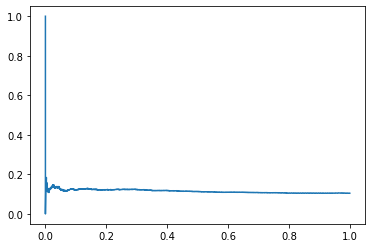

In [180]:
# caculate the accuracy
print('Accuracy on the test set is',metrics.accuracy_score(y_train_pred_final.EZ, y_train_pred_final.predicted))
# ROC Curve and auc value

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr,tpr)

precision,recall,threshold = metrics.precision_recall_curve(y_train, y_train_pred)

# plt.plot([0,1],[0,1],linestyle = '--')
# plt.plot(fpr,tpr,label = 'ROC curve')

plt.plot(recall,precision)

print('AUC is', roc_auc)

Accuracy on the test set is 0.8712051517939282
AUC of the test set is 0.5365020362224833


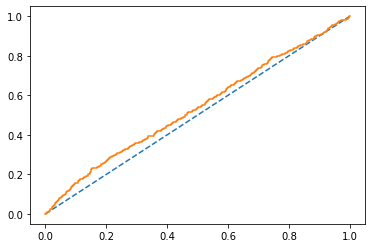

In [137]:
# try on the test set
X_test[['n1Zscore','n2Zscore','p2Zscore','n1Latency','n2Latency','p2Latency']]=scaler.fit_transform(X_test[['n1Zscore','n2Zscore','p2Zscore','n1Latency','n2Latency','p2Latency']])
X_test = sm.add_constant(X_test)

y_test_pred = res1.predict(X_test)
y_test_pred_final = pd.DataFrame({'EZ':y_test.values, 'EZ_Prob':y_test_pred})
y_test_pred_final['NodeID'] = y_test.index
y_test_pred_final.head()

# Creating new column 'predicted' 
y_test_pred_final['predicted'] = y_test_pred_final.EZ_Prob.map(lambda x: 1 if x < 0.09 else 0)

# Let's see the dataframe
y_test_pred_final.head()

print('Accuracy on the test set is',metrics.accuracy_score(y_test_pred_final.EZ, y_test_pred_final.predicted))

# ROC Curve and auc value for the test set
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr,tpr)

plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,label = 'ROC curve')

print('AUC of the test set is', roc_auc)

<AxesSubplot:>

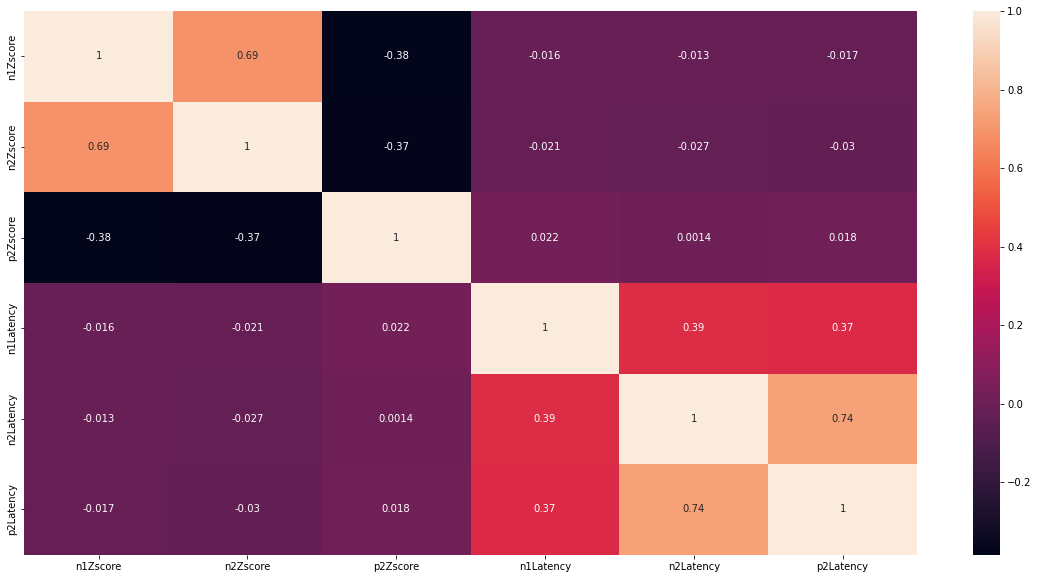

In [158]:
# Parameters corelated?
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

In [161]:
# using RFE to find the best parameters

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('n1Zscore', True, 1),
 ('n2Zscore', False, 2),
 ('p2Zscore', False, 3),
 ('n1Latency', True, 1),
 ('n2Latency', True, 1),
 ('p2Latency', False, 4)]

In [167]:
# Best parameters
col = X_train.columns[rfe.support_]

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                outcome   No. Observations:                21736
Model:                            GLM   Df Residuals:                    21732
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7261.6
Date:                Mon, 29 Nov 2021   Deviance:                       14523.
Time:                        21:07:02   Pearson chi2:                 2.17e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0008846
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1536      0.022    -96.742      0.000      -2.197      -2.110
n1Zscore      -0.0183      0.022     -0.818      0.414      -0.062       0.026
n1Latency      0.1011      0.024      4.300      0.000       0.055       0.147
n2Latency     -0.0534      0.024     -2.189      0.029      -0.101      -0.006
==============================================================================
"""

Accuracy is 0.874355907250644
AUC is 0.5263816119900464


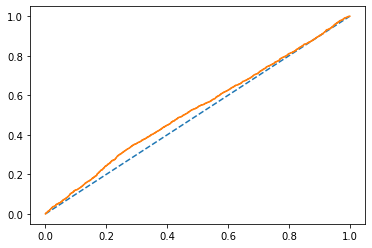

In [177]:
# Getting the result on best parameters training set
y_train_pred2 = res.predict(X_train_sm)

# Creating a dataframe with the actual EZ node and the predicted probabilities
y_train_pred_final2 = pd.DataFrame({'EZ':y_train.values, 'EZ_Prob':y_train_pred2})
y_train_pred_final2['NodeID'] = y_train.index
y_train_pred_final2.head()

y_train_pred_final2['predicted'] = y_train_pred_final2.EZ_Prob.map(lambda x: 1 if x < 0.09 else 0)

print('Accuracy is',metrics.accuracy_score(y_train_pred_final2.EZ, y_train_pred_final2.predicted))

# ROC Curve and auc value
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred2)
roc_auc = metrics.auc(fpr,tpr)

plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,label = 'ROC curve')

print('AUC is', roc_auc)